# Outlier Detection

In [1]:
import numpy as np

In [2]:
def remove_outliers(data):
    mean = np.mean(data)
    std = np.std(data)
    
    lower = mean - std * 3
    upper = mean + std * 3
    
    filtered = [val for val in data if lower < val < upper ]
    outliers = [val for val in data if val not in filtered]
    
    return filtered, outliers

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data = [1, 1, 2, 2, 2, 3, 3, 3, 3,3 ,3 , 5, 5, 5, 5, 6, 6, 7, 7, 8, 9000]
filtered_data, outliers = remove_outliers(data)

In [6]:
filtered_data

[1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 6, 6, 7, 7, 8]

In [7]:
outliers

[9000]

In [8]:
# import scipy.stats as stats
from scipy import stats

In [9]:
x = [*stats.norm.rvs(loc=5 , scale=1 , size=100), -5, 11, 14]

In [10]:
def remove_outliers_iqr(data):
    q1, q2 = np.percentile(data, [25, 75])
    iqr = q2 - q1
    lower = q1 - iqr * 1.5
    upper = q2 + iqr * 1.5
    
    filtered = [val for val in data if lower < val < upper ]
    outliers = [val for val in data if val not in filtered]
    
    return filtered, outliers

In [11]:
filtered_data, outliers = remove_outliers(x)

In [12]:
stats.iqr(x)

1.357091519690199

In [13]:
import matplotlib.pyplot as plt

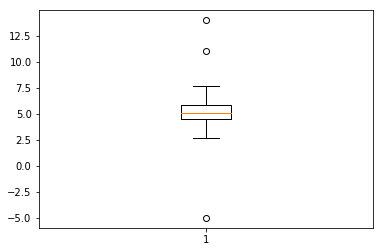

In [14]:
plt.boxplot(x)
plt.show()

# Gaussian Mixture Model (GMM)

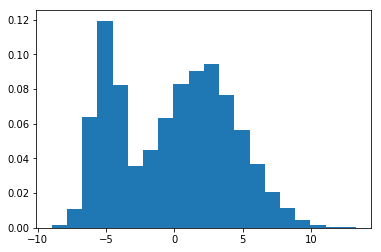

In [15]:
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

In [16]:
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))
print('means:')
print(gmm.means_) # Means of the groups
print()

print('covariances:')
print(gmm.covariances_) # Variances of each group (std^2)
print()

print('weights:')
print(gmm.weights_) # Percentage of the data that belongs to each group
print()

means:
[[-4.9747641 ]
 [ 2.12638214]]

covariances:
[[[1.14494938]]

 [[8.23664891]]]

weights:
[0.31553808 0.68446192]



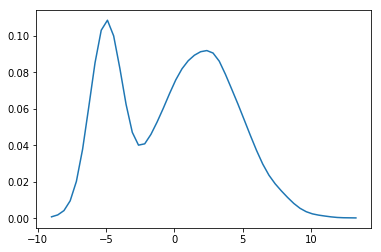

In [17]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

# Correlation

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df = df.drop('species', axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


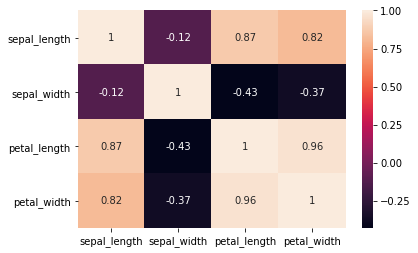

In [22]:
sns.heatmap(df.corr(), annot=True)

In [24]:
def corrplot_(df=None, mask_type="numerical", figsize=(14, 14), fontsize=8, cpalette=(10, 220)):
    """ Global function that produces customized correlation plot reducing redundancy. """    
    if df is None:
        raise ReferenceError("\nDataFrame not found.")
    corr_data = df.corr()

    # Creates whitespace mask over upper right triangle section for repeated features
    upper_triangle_mask = np.zeros_like(corr_data, dtype=np.bool)
    upper_triangle_mask[np.triu_indices_from(upper_triangle_mask)] = True
    
    # Generates MatPlotLib subplot objects
    fig, ax = plt.subplots(figsize=figsize)
    
    # Calculates relative maximum from correlational data
    vmax = np.abs(corr_data.values[~upper_triangle_mask]).max()
    
    # Creates correlational heatmap with simple color intensity relative to distribution
    cmap = sns.diverging_palette(cpalette[0], cpalette[1], as_cmap=True)
    sns.heatmap(corr_data, mask=upper_triangle_mask, cmap=cmap, vmin=-vmax, vmax=vmax, square=True, linecolor="lightgray", linewidths=1, ax=ax)
    
    # Overlays feature names and corr. data values over whitespace mask
    for iterator in range(len(corr_data)):
        ax.text(iterator+0.5, iterator+0.5, corr_data.columns[iterator], ha="center", va="center", rotation=45)
        
        for jterator in range(iterator+1, len(corr_data)):
            value = "{:.3f}".format(corr_data.values[iterator, jterator])
            
            # Switch-case for numerical" whitespace mask
            if mask_type == "numerical":
                ax.text(jterator+0.5, (iterator+0.5), value, ha="center", va="center")
                
            # Switch-case for categorical whitespace mask
            if mask_type == "categorical":
                ax.text(jterator+0.5, (iterator+0.5), _value_to_category(value), ha="center", va="center", fontsize=fontsize)
    ax.axis("off")

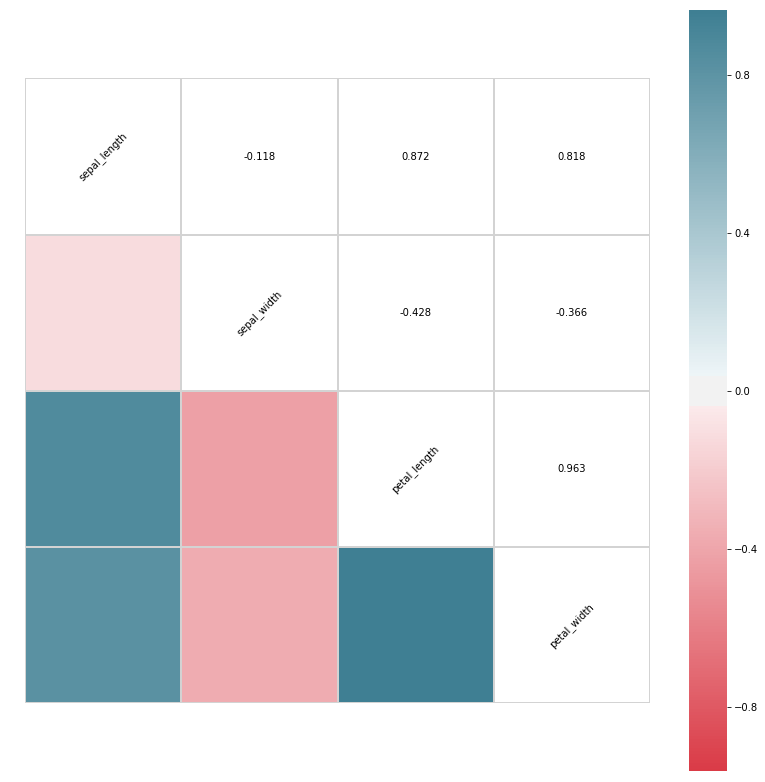

In [25]:
corrplot_(df)

In [31]:
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    x_deviations = x - x_mean
    y_deviations = y - y_mean
    
    numerator = np.sum(x_deviations * y_deviations)
    denominator = np.sqrt(np.sum(x_deviations ** 2))* np.sqrt(np.sum(y_deviations ** 2))
    
    return numerator / denominator

In [32]:
pearson_corr(df['sepal_length'], df['petal_length'])

0.8717537758865832